# Online marketing 
Creating a model to find out whether a customer completed a online shopping or not.
Here Iwill be using Pandas library to encode the column that mans convert words to numerical but we can also do it by using specific library like 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_1 = LabelEncoder()

X[:,1](Or whatever matrix column you wanna change) = labelencoder_1.fit_transform(X[:, 1])

onehotencoder = OneHotEncoder(categorical_features = [1])

X = onehotencoder.fit_transform(X).toarray()


Or do what i ahve done below in this model

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Using TensorFlow backend.
C:\Users\karti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\karti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\karti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\karti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [6]:
data =  pd.read_csv('Customers2.csv')
data

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,German,Canada,0.0,0.0,No,Yes
749,750,0,4,0,0,0,German,Canada,0.0,0.0,No,Yes
750,751,15,0,0,0,0,English,India,0.0,0.0,No,Yes
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,Yes,Yes


# Inserting data
While inserting the data we can directly convert data from pandas form to array by 

(X = data.iloc[:, 0:11].values)

Or we need to just do the above code ======>  

(X = data.iloc[:, 0:11].values) and (X = np.array(data_final.iloc[:, 0:18]))

Both of these code will work the same way

In [7]:
#  I am not using this in the actual code
'''
X = data.iloc[:, 0:11].values
Y = data.iloc[:, 11:].values
Y
'''

'\nX = data.iloc[:, 0:11].values\nY = data.iloc[:, 11:].values\nY\n'

# Remove Nan
In the data given there are a lot of Nan included. Even a single Nan in your data set can ruin your model. So it is very important to remove this Nan from the data set. This code written below will remove Nan from the data set.

In [8]:
# This code removes Nan. But we are not going to use it directly. We will implement it in 2 steps. 1st all the rows
# which has Nan will get recognized and in the 2nd step will remove them.
   
    
# I am not using this code in the model. Read the statement above. I have re implemented the details below after a while(Converting all the text data to numbers) 
'''   
t,k = X.shape
for x in range(t):
    for y in range(k):
        if str(X[x, y]) == 'nan':
            X = np.delete(X, x, 0)
            Y = np.delete(Y, x, 0)
            print("NAN waali row removed")  
            print(x)
            break
'''

'   \nt,k = X.shape\nfor x in range(t):\n    for y in range(k):\n        if str(X[x, y]) == \'nan\':\n            X = np.delete(X, x, 0)\n            Y = np.delete(Y, x, 0)\n            print("NAN waali row removed")  \n            print(x)\n            break\n'

# Label & One Hot Encode using Pandas

Datas can be Label encoded and one hot encoded using the code written in the 1st cell of the notebook. But even using the pandas library we can label encode the data set.

In [13]:
# This way we directly can make one hot encoder in 'country' column of the table. But the problem with this tye of the code is 
# that here all the countries are alloted with a number even if out of all the countries only top 5 are most occuring and rest
# are near about 0. Let say there are about 100 countries, So about 100 columns would be made and to distinguish between them 
# we will have a vector = [0,0,0,0,...0,1,0,0,0] where (1) appears only once in the vector corresponding to the country where
# it belongs. So in these condition we make just 5-10 columns with maximum occurence adn the rest of the countries will be
# adjusted in just one column ("Others") OR A NULL VECTOR [0,0,0,0,0,0....00]. So to apply One hot encoder in best 5 country 
# we need to do something else. 


# BUt we can do apply it for YES and NO Options (That means in the Client and Made A Purchase colums). As they only hav two columns

dummies = pd.get_dummies(data.PriorClient, data.MadeAPurchase)
dummies    

,"0 No\n1 No\n2 No\n3 No\n4 Yes\n ... \n748 Yes\n749 Yes\n750 Yes\n751 Yes\n752 Yes\nName: MadeAPurchase, Length: 753, dtype: object_No","0 No\n1 No\n2 No\n3 No\n4 Yes\n ... \n748 Yes\n749 Yes\n750 Yes\n751 Yes\n752 Yes\nName: MadeAPurchase, Length: 753, dtype: object_Yes"
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
748,1,0
749,1,0
750,1,0
751,0,1


In [11]:
# The above mentioned code will be implemented this way in two steps(look in this cell and the next).

# This cell recognizes the Nan containing Rows

'''
t,k = X.shape
for x in range(t):
    for y in range(k):
            
        if str(X[x, y]) == 'nan':
            print("NAN row removed")  
            print(x)
            
'''       

'\nt,k = X.shape\nfor x in range(t):\n    for y in range(k):\n            \n        if str(X[x, y]) == \'nan\':\n            print("NAN row removed")  \n            print(x)\n            \n'

In [12]:
# This code deletes the Nan containg rows
'''
X = np.delete(X, [54, 55, 56, 57, 58, 59, 60], 0)
Y = np.delete(Y, [54, 55, 56, 57, 58, 59, 60], 0)
'''

'\nX = np.delete(X, [54, 55, 56, 57, 58, 59, 60], 0)\nY = np.delete(Y, [54, 55, 56, 57, 58, 59, 60], 0)\n'

In [14]:
# This is the way to rename few headings of the of the data inserted


# dummies.rename(columns = {'0 No\n1 No\n2 No\n3 No\n4 Yes\n ... \n748 Yes\n749 Yes\n750 Yes\n751 Yes\n752 Yes\nName: MadeAPurchase, Length: 753, dtype: object_No' : 'PriorClient',
#                          '0 No\n1 No\n2 No\n3 No\n4 Yes\n ... \n748 Yes\n749 Yes\n750 Yes\n751 Yes\n752 Yes\nName: MadeAPurchase, Length: 753, dtype: object_Yes' : 'MadeAPurchase'
#                         }, inplace = True)
# dummies.columns

In [15]:
# This is the way to change the name of all the columns of the inserted data. 

column_name = ['Prior_Client', 'Made_A_Purchase']
dummies.columns = column_name
dummies

,Prior_Client,Made_A_Purchase
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
748,1,0
749,1,0
750,1,0
751,0,1


# Using Pandas to One Hot Encode the data set

In [16]:
# Just checking out the 10 Most Occured Language in the data set

data.Language.value_counts().sort_values(ascending = False).head(10)

English       384
German         96
Spanish        75
Japanese       72
Chinese        27
Portuguese     15
Italian        15
Dutch          12
Finnish         9
French          9
Name: Language, dtype: int64

In [17]:
# Just checking out the 10 Most Occured Country in the data set

data.Country.value_counts().sort_values(ascending = False).head(10)

USA         180
Canada      151
Japan        72
France       43
China        39
Mexico       36
Spain        27
Colombia     27
India        24
Brazil       24
Name: Country, dtype: int64

In [18]:
# At the end of the code above you need to add the ".index" word. 
# If you won't do that then the nmber of times this language is used will append in the list (as numerical data)
# list like this would have been the result = " [384, 96, 75, 72, 27] " instaed of the country

Top5_Language = [x for x in data.Language.value_counts().sort_values(ascending = False).head(5).index]
Top5_Language

['English', 'German', 'Spanish', 'Japanese', 'Chinese']

In [19]:
# An array has be made for the 5 most occured countries in the data set

Top5_Country = [x for x in data.Country.value_counts().sort_values(ascending = False).head(5).index]
Top5_Country

['USA', 'Canada', 'Japan', 'France', 'China']

# Here comes the actual code for applying One hot encode to the data set

When you will be applying this code you donot need to merge it again with the data set because it will aleady be added to the original data set. So the Countries (Encoded) and Language(Encoded) is already added.

But if you are using the ".get_dummies" of pandas then you need to apply merging of data with the original data set. I have done this merging below only for the last two column(PrioCients and MadeAPurchase) of the data set

In [20]:
for label_1 in Top5_Language:
    data[label_1] = np.where(data['Language'] == label_1, 1, 0)
 
Language_data = data[['Language'] + Top5_Language]
Language_data

,Language,English,German,Spanish,Japanese,Chinese
0,German,0,1,0,0,0
1,English,1,0,0,0,0
2,Spanish,0,0,1,0,0
3,English,1,0,0,0,0
4,English,1,0,0,0,0
...,...,...,...,...,...,...
748,German,0,1,0,0,0
749,German,0,1,0,0,0
750,English,1,0,0,0,0
751,Spanish,0,0,1,0,0


In [21]:
for label_2 in Top5_Country:
    data[label_2] = np.where(data['Country'] == label_2, 1, 0)
 
Country_data = data[['Country'] + Top5_Country]
Country_data

,Country,USA,Canada,Japan,France,China
0,Germany,0,0,0,0,0
1,USA,1,0,0,0,0
2,Mexico,0,0,0,0,0
3,India,0,0,0,0,0
4,USA,1,0,0,0,0
...,...,...,...,...,...,...
748,Canada,0,1,0,0,0
749,Canada,0,1,0,0,0
750,India,0,0,0,0,0
751,Colombia,0,0,0,0,0


In [22]:
data[['Country'] + Top5_Country].head

<bound method NDFrame.head of          Country  USA  Canada  Japan  France  China
0        Germany    0       0      0       0      0
1            USA    1       0      0       0      0
2         Mexico    0       0      0       0      0
3          India    0       0      0       0      0
4            USA    1       0      0       0      0
..           ...  ...     ...    ...     ...    ...
748       Canada    0       1      0       0      0
749       Canada    0       1      0       0      0
750        India    0       0      0       0      0
751     Colombia    0       0      0       0      0
752  Switzerland    0       0      0       0      0

[753 rows x 6 columns]>

In [23]:
# Already are data set is containing the columns of the Countries(One Hot Encoded) and 
# Language(One Hot Encoded) because of the code above. So we just need to remove the original columns of Language and Country

data

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,...,English,German,Spanish,Japanese,Chinese,USA,Canada,Japan,France,China
0,1,33,19,1,0,1,German,Germany,10.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,English,USA,61.0,0.0,...,1,0,0,0,0,1,0,0,0,0
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,4,0,10,0,0,1,English,India,26.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,5,7,0,0,0,0,English,USA,11.0,0.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,German,Canada,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
749,750,0,4,0,0,0,German,Canada,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
750,751,15,0,0,0,0,English,India,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
# This code merges the original data with the label encoded data set (done by Pandas). 
# Use this code only when you are using the "get_dummies" code written above. Otherwise you need not execute this code
# AS MENTIONED ABOVE IN THE HEADING. This code merges the last two column of PriorClient and MadeAPurchase (Encoded) with the data set. 

data_set = pd.concat([data, dummies], axis = 'columns')
data_set

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,...,Spanish,Japanese,Chinese,USA,Canada,Japan,France,China,Prior_Client,Made_A_Purchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,1,0,1,0,English,USA,61.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
3,4,0,10,0,0,1,English,India,26.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,5,7,0,0,0,0,English,USA,11.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,German,Canada,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
749,750,0,4,0,0,0,German,Canada,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
750,751,15,0,0,0,0,English,India,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [25]:
# Now we need to drop out the columns that are NOT USEFUL in our training set and 
# other columns for which we have already applied One hot encoder.

data_final = data_set.drop(['CustomerID', 'Language', 'Country', 'PriorClient', 'MadeAPurchase'], axis = 'columns')
data_final


,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,WebVisits,PageVisits,English,German,Spanish,Japanese,Chinese,USA,Canada,Japan,France,China,Prior_Client,Made_A_Purchase
0,33,19,1,0,1,10.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,61.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0
2,4,6,2,0,0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,10,0,0,1,26.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0
4,7,0,0,0,0,11.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,3,0,0,0,0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0
749,0,4,0,0,0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0
750,15,0,0,0,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0
751,0,1,0,0,0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1


#  Converting to Array

As mentioned before this is another way to convert pandas dat to array. And i have actually used this code in my model

In [26]:
X = np.array(data_final.iloc[:, 0:18])
Y = np.array(data_final['Made_A_Purchase'])

# Nan

This code to assert if a Nan is there in the data set or not.

In [27]:
assert np.any(np.isnan(X))
X.shape

(753, 18)

In [28]:
assert not np.any(np.isnan(X_new))

NameError: name 'X_new' is not defined

In [29]:
# This is the code to find out exactly which rows are having the Nan in the data set

# I am actually using this code inthe data set

t,k = X.shape
for x in range(t):
    for y in range(k):
            
        if str(X[x, y]) == 'nan':
            
            print("NAN row removed")  
            print(x)
            
         

NAN row removed
54
NAN row removed
54
NAN row removed
55
NAN row removed
55
NAN row removed
56
NAN row removed
56
NAN row removed
57
NAN row removed
57
NAN row removed
58
NAN row removed
58
NAN row removed
59
NAN row removed
59
NAN row removed
60
NAN row removed
60
NAN row removed
61
NAN row removed
61
NAN row removed
62
NAN row removed
62
NAN row removed
63
NAN row removed
63
NAN row removed
64
NAN row removed
64
NAN row removed
65
NAN row removed
65
NAN row removed
66
NAN row removed
66
NAN row removed
67
NAN row removed
67


In [30]:
# As mentioned previously I am using this line of code to delete the rows that has Nan

# I am using this code in my model

X = np.delete(X, [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67], 0)
Y = np.delete(Y, [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67], 0)

In [31]:
# Checking it again, If at all any Nan 

t,k = X.shape
for x in range(t):
    for y in range(k):
            
        if str(X[x, y]) == 'nan':
            
            print("NAN row removed")  
            print(x)

NAN row removed
54
NAN row removed
54


In [32]:
X = np.delete(X, 54, 0)
Y = np.delete(Y, 54, 0)

In [33]:
# Checked again
# Appears(In the Output) as if there is no Nan left now

t,k = X.shape
for x in range(t):
    for y in range(k):
            
        if str(X[x, y]) == 'nan':
            
            print("NAN waali row removed")  
            print(x)

In [34]:
Y = Y.reshape(739, 1)
Y.shape

(739, 1)

In [35]:
X.shape

(739, 18)

# Model Ingredients

Here I am starting the code required for making the model. I am not making Heading for each code block of the model for that you can se the previous loaded model of Spam filtering. There i have coded each of the under a seperate heading.  

In [36]:
def initialize_parameters_L_layer(node_vector):
       
    parameters = {}
    L = len(node_vector)            

    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(node_vector[l], node_vector[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros(shape = (node_vector[l], 1))
        
    return parameters

In [37]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A    

In [38]:
def relu(Z):
    A = np.maximum(Z, 0)
    return A    

In [39]:
def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [40]:
def sigmoid_derivative(Z):
    A = Z * (1-Z)
    return A

In [41]:
def forward_propogation(parameters, X):
    caches = []
    A = X
    L = len(parameters) // 2              
        
    for l in range(1, L):
        A_prev = A 
     
        Z = np.dot(parameters["W" + str(l)], A_prev) + parameters["b" + str(l)]
        linear_cache = (A_prev, parameters["W" + str(l)], parameters["b" + str(l)])
        A = relu(Z)
    
        cache = (linear_cache)
        caches.append(cache)
        
    Z_hat = np.dot(parameters["W" + str(L)], A) + parameters["b" + str(L)]
    linear_cache = (A, parameters["W" + str(L)], parameters["b" + str(L)])
    A_hat = sigmoid(Z_hat)
    cache = (linear_cache)
    caches.append(cache)
    
            
    return A_hat, caches

In [42]:
def compute_cost(A_hat, Y, epsilon):
    m = Y.shape[1]

    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(A_hat + epsilon)) + np.multiply(1 - Y, np.log(1 - A_hat + epsilon)))
    cost = np.squeeze(cost)     
    
    return cost

In [43]:
def backward_prop_1(dA, cache, AL, Y_hat, activation):
    A_prev, W, b = cache
    
  
    m = A_prev.shape[1]
    
    if activation == "relu":
        
        dZ = dA * relu_derivative(np.dot(W, A_prev) + b)  
        dW = (1/m) * np.dot(dZ, A_prev.T)  
        db = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T, dZ) 
                
    elif activation == "sigmoid":
        
        # dZ = AL - Y_hat     # This line is for linear regression
        dZ = dA * sigmoid_derivative(AL) 
        dW = (1/m) * np.dot(dZ, A_prev.T)
        db = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T, dZ)
            
    return dA_prev, dW, db

In [44]:
def back_propogation(A_hat, Y, caches):
    grads = {}
    L = len(caches) 
    m = A_hat.shape[1]
    Y = Y.reshape(A_hat.shape) 
    
    dAL = - (np.divide(Y, A_hat) - np.divide(1 - Y, 1 - A_hat))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_prop_1(dAL, current_cache, A_hat, Y, activation = "sigmoid")
    
    # Ranges from l-2 to 0
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        
        dA_prev_temp, dW_temp, db_temp = backward_prop_1(grads["dA" + str(l+1)], current_cache, A_hat, Y, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
       
    return grads

In [45]:
def initialize_adam(parameters) :
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    for l in range(L):
    
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        
    return v, s

In [46]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
   
    
    L = len(parameters) // 2                 
    v_corrected = {}                         
    s_corrected = {}                         
    
    # Perform Adam update on all parameters
    for l in range(L):
       
        v["dW" + str(l+1)] = (v["dW" + str(l+1)] * beta1) + ((1-beta1) * grads["dW" + str(l+1)])
        v["db" + str(l+1)] = (v["db" + str(l+1)] * beta1) + ((1-beta1) * grads["db" + str(l+1)])
        
        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1-np.power(beta1,t)) 
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1-np.power(beta1,t))
        

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        
        s["dW" + str(l+1)] = (s["dW" + str(l+1)] * beta2) + ((1-beta2) * (grads["dW" + str(l+1)] ** 2))
        s["db" + str(l+1)] = (s["db" + str(l+1)] * beta2) + ((1-beta2) * (grads["db" + str(l+1)] ** 2))
        
        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1-np.power(beta2,t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1-np.power(beta2,t))
        
        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * (v_corrected["dW" + str(l+1)] / np.sqrt(s_corrected["dW" + str(l+1)] + epsilon))) 
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * (v_corrected["db" + str(l+1)] / np.sqrt(s_corrected["db" + str(l+1)] + epsilon)))
        

    return parameters, v, s

In [47]:
def model(X, Y, node_vector,beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, learning_rate = 0.009, num_iterations = 2500, print_cost=True):
   
    costs = []
    t = 0
    
        # Parameters initialization.
    
    parameters = initialize_parameters_L_layer(node_vector)
    v, s = initialize_adam(parameters)
    
    for i in range(0, num_iterations):

        # Forward propagation
    
        A_hat, caches = forward_propogation(parameters, X)
              
        # Compute cost.
      
        cost = compute_cost(A_hat, Y, epsilon)
          
        # Backward propagation.
      
        grads = back_propogation(A_hat, Y, caches)
      
 
        # Update parameters.
      
        #parameters = update_parameters(parameters, grads, learning_rate)
        t = t + 1 # Adam counter
        parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
                        
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, A_hat

# Splitting the data set

Here I am splitting the data set into X_train, Y_train, X_test, y_test

In [48]:
 X_data_set = X.T
Y = Y.T 
X_train = X_data_set[:, :678]

X_test = X_data_set[:, 678:]
Y_train = Y[:, :678]

Y_test = Y[:, 678:]


# Normalizing the code

Any valu or say numerical may be 450 and other may be 0 or 1. This doesnot imply that the larger numerical has more weightage than the lower nuericals. So it is important to normalize it.

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train


array([[ 3.43412385, -0.26355339,  1.97020822, ...,  4.04411161,
         1.87082869,  4.11438171],
       [ 1.79820852, -0.19167519,  3.21455025, ..., -0.31108551,
        -0.53452248, -0.27299215],
       [-0.30511119, -0.26355339,  0.72586619, ..., -0.31108551,
        -0.53452248, -0.27299215],
       ...,
       [-0.42196229, -0.26355339, -0.51847585, ..., -0.31108551,
         1.87082869, -0.27299215],
       [-0.42196229, -0.26355339, -0.51847585, ..., -0.31108551,
        -0.53452248, -0.27299215],
       [-0.42196229, -0.19167519,  0.10369517, ...,  0.31108551,
        -0.53452248, -0.27299215]])

In [50]:

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(18, 678)
(1, 678)
(18, 61)
(1, 61)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.207322
Cost after iteration 200: 0.049913


C:\Users\karti\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Cost after iteration 300: 0.045651
Cost after iteration 400: 0.025756
Cost after iteration 500: 0.024978
Cost after iteration 600: 0.024168
Cost after iteration 700: 0.025388
Cost after iteration 800: 0.014550
Cost after iteration 900: 0.014119


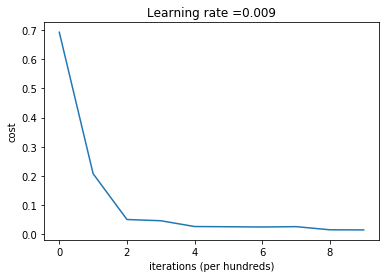

In [942]:
parameters, A_hat = Spam_model(X_train, Y_train, node_vector = [18,10, 5,2, 1], num_iterations = 1000, print_cost = True)

In [943]:
def predict(A_hat, Y):
    count = 0
    for i in range (len(A_hat)):
        if A_hat[:,i] == Y[:,i]:
            count = count + 1
    pred = (count / len(Y))*100
    return pred


In [944]:
A_hat_test, cache = forward_propogation(parameters, X_test)

In [945]:
A_hat_pred = np.round(A_hat_test)

In [946]:
print(A_hat_pred.shape)
print(Y_test.shape)
A_hat_pred

(1, 61)
(1, 61)


array([[0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.]])

In [947]:
Y_test

array([[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]], dtype=uint8)

In [948]:
final_pred = A_hat_pred - Y_test

In [949]:
count = 0
for y in final_pred:
    for x in y:
        if x == 1:
            count += 1

accuracy = count / 61
print(f"Accuracy at the test set is{(1 - accuracy)*100}")


Accuracy at the test set is100.0


# Keras library

Now i am Re-implementing my model using the Keras library. Where I donot need to code again and again for forward or back propogation or for weights of the matrix or for the activation rule.

In [51]:
classifier = Sequential()

# 1st Hidden and Input layer

I am adding the 1st hidden and the input layer in the model using just one line of code of keras. The output_dim correspond to the number of nodes in the 1st hidden layer and the input_dim corresponds to the nodes in the input layer. While INIT means that the weight matrix will be initialized uniformily.

In [52]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 18) )

C:\Users\karti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=18, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# 2nd Hidden Layer

Now we are adding the 2nd Hidden layer. For this we just need to mention the nodes of 2nd hidden layer(6) in it in the output_dim. NOTE: that there is no need to mention the Input_dims as we have already know that the previous layer has 6 nodes.

In [53]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu') )

C:\Users\karti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# Output layer (Sigmoid Func)

In [54]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid') )

C:\Users\karti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# Splitting the data set

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1 , random_state = 0) 


# Preprocessing  

In [859]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [860]:
# We could have use categorical_crossentropy in the lost only if the output layer has many nodes like in softmax

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [861]:
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T


In [862]:
classifier.fit(X_train, Y_train, batch_size = 20, epochs = 200)

Epoch 1/200
678/678 [==============================] - 0s 159us/step - loss: 0.6913 - accuracy: 0.6224
Epoch 2/200
678/678 [==============================] - 0s 44us/step - loss: 0.6869 - accuracy: 0.6401
Epoch 3/200
678/678 [==============================] - 0s 38us/step - loss: 0.6780 - accuracy: 0.6401
Epoch 4/200
678/678 [==============================] - 0s 41us/step - loss: 0.6612 - accuracy: 0.6401
Epoch 5/200
678/678 [==============================] - 0s 43us/step - loss: 0.6299 - accuracy: 0.6549
Epoch 6/200
678/678 [==============================] - 0s 44us/step - loss: 0.5843 - accuracy: 0.7139
Epoch 7/200
678/678 [==============================] - 0s 43us/step - loss: 0.5271 - accuracy: 0.8142
Epoch 8/200
678/678 [==============================] - 0s 41us/step - loss: 0.4677 - accuracy: 0.8348
Epoch 9/200
678/678 [==============================] - 0s 43us/step - loss: 0.4102 - accuracy: 0.8894
Epoch 10/200
678/678 [==============================] - 0s 41us/step - loss: 0.35

678/678 [==============================] - 0s 38us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 160/200
678/678 [==============================] - 0s 46us/step - loss: 0.0082 - accuracy: 0.9971
Epoch 161/200
678/678 [==============================] - 0s 49us/step - loss: 0.0075 - accuracy: 0.9971
Epoch 162/200
678/678 [==============================] - 0s 40us/step - loss: 0.0071 - accuracy: 0.9971
Epoch 163/200
678/678 [==============================] - 0s 41us/step - loss: 0.0070 - accuracy: 0.9985
Epoch 164/200
678/678 [==============================] - 0s 46us/step - loss: 0.0070 - accuracy: 0.9985
Epoch 165/200
678/678 [==============================] - 0s 46us/step - loss: 0.0072 - accuracy: 0.9985
Epoch 166/200
678/678 [==============================] - 0s 35us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 167/200
678/678 [==============================] - 0s 41us/step - loss: 0.0069 - accuracy: 0.9985
Epoch 168/200
678/678 [==============================] - 0s 37us/step - loss: 

In [863]:
Y_pred =  classifier.predict(X_test)

In [864]:
y_pred = np.round(Y_pred) 

In [865]:
result = Y_test - y_pred

In [866]:
t = 0
for num in result:
    if num == 0:
        t += 1
print ("Accuracy ata the test set is")        
print(t/len(Y_test)*100)        

Accuracy ata the test set is
100.0
